In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator

In [32]:
def load_data(path):
  data = []
  
  with open(path, 'r') as file:
    for _ in range(5):
      next(file)

    for line in file:
      columns = line.split(";")
      data.append(int(columns[0]))
      
  data = np.array(data)
  data = data - data[0]
    
  return data

In [33]:
spinning0 = load_data("Data/Spinning_wheel/Part_0.txt")
spinning1 = load_data("Data/Spinning_wheel/Part_1.txt")
spinning2 = load_data("Data/Spinning_wheel/Part_2.txt")
spinning_old = load_data("Data/Spinning_wheel/Old.txt")

static0 = load_data("Data/Static_wheel/Part_0.txt")
static1 = load_data("Data/Static_wheel/Part_1.txt")
static2 = load_data("Data/Static_wheel/Part_2.txt")

In [34]:
norm_data1 = np.diff(static0)
norm_data2 = np.diff(spinning_old)

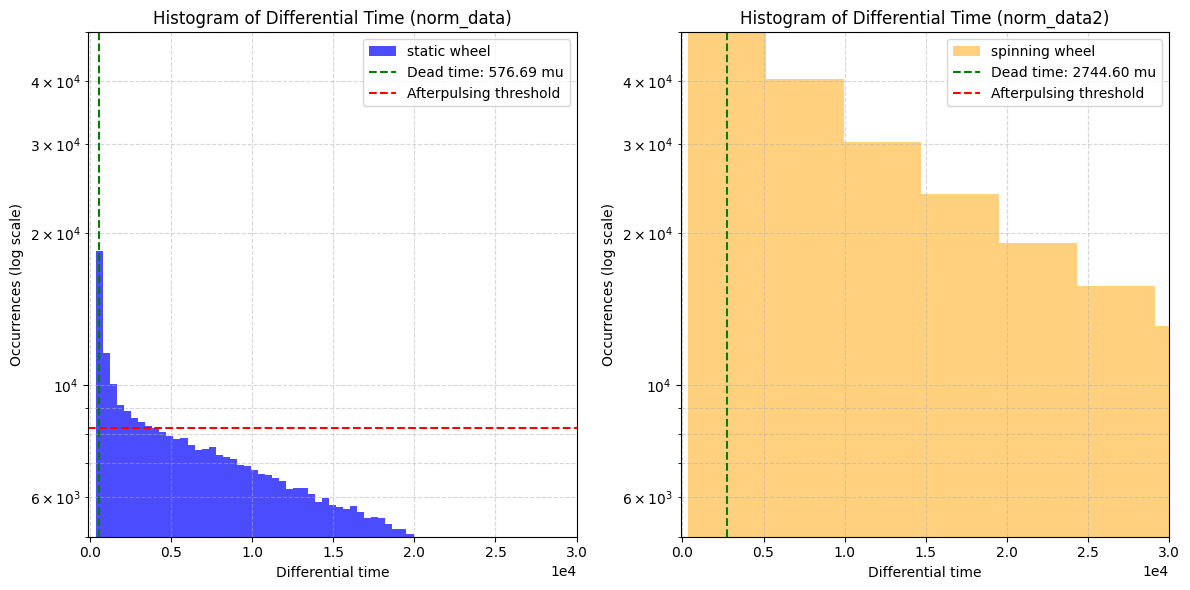

Dead time static: 4.6711647000000005e-08
Dead time spinning: 2.2231276199999997e-07


In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First histogram (norm_data) in the first subplot
counts1, bin_edges1, _ = ax1.hist(norm_data1, bins=1000, log=True, color="blue", alpha=0.7, label="static wheel")
first_bin_center1 = (bin_edges1[0] + bin_edges1[1]) / 2
ax1.axvline(first_bin_center1, color="green", linestyle="--", label=f"Dead time: {first_bin_center1:.2f} mu")
bin_index1 = np.digitize(3900, bin_edges1) - 1
if 0 <= bin_index1 < len(counts1):
    bin_height1 = counts1[bin_index1]
    ax1.axhline(y=bin_height1, color="red", linestyle="--", label="Afterpulsing threshold")
ax1.set_xlabel("Differential time")
ax1.set_ylabel("Occurrences (log scale)")
ax1.set_title("Histogram of Differential Time (norm_data)")
ax1.grid(which="both", linestyle="--", alpha=0.5)
ax1.yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))
ax1.ticklabel_format(style="scientific", axis="x", scilimits=(0, 0))
ax1.legend()
ax1.set_xlim(-100, 30000)
ax1.set_ylim(5000, 50000)

# Second histogram (norm_data2) in the second subplot
counts2, bin_edges2, _ = ax2.hist(norm_data2, bins=1000, log=True, color="orange", alpha=0.5, label="spinning wheel")
first_bin_center2 = (bin_edges2[0] + bin_edges2[1]) / 2
ax2.axvline(first_bin_center2, color="green", linestyle="--", label=f"Dead time: {first_bin_center2:.2f} mu")
bin_index2 = np.digitize(3900, bin_edges2) - 1
if 0 <= bin_index2 < len(counts2):
    bin_height2 = counts2[bin_index2]
    ax2.axhline(y=bin_height2, color="red", linestyle="--", label="Afterpulsing threshold")
ax2.set_xlabel("Differential time")
ax2.set_ylabel("Occurrences (log scale)")
ax2.set_title("Histogram of Differential Time (norm_data2)")
ax2.grid(which="both", linestyle="--", alpha=0.5)
ax2.yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))
ax2.ticklabel_format(style="scientific", axis="x", scilimits=(0, 0))
ax2.legend()
ax2.set_xlim(-100, 30000)
ax2.set_ylim(5000, 50000)

plt.tight_layout()
plt.show()

print(f"Dead time static: {first_bin_center1 * 81 * 1E-12}")
print(f"Dead time spinning: {first_bin_center2 * 81 * 1E-12}")

In [36]:
counts1 = counts1[bin_index1:]
bin_edges1 = bin_edges1[bin_index1:]
bin_edges1 = bin_edges1 - bin_edges1[0]

counts2 = counts2[bin_index2:]
bin_edges2 = bin_edges2[bin_index2:]
bin_edges2 = bin_edges2 - bin_edges2[0]

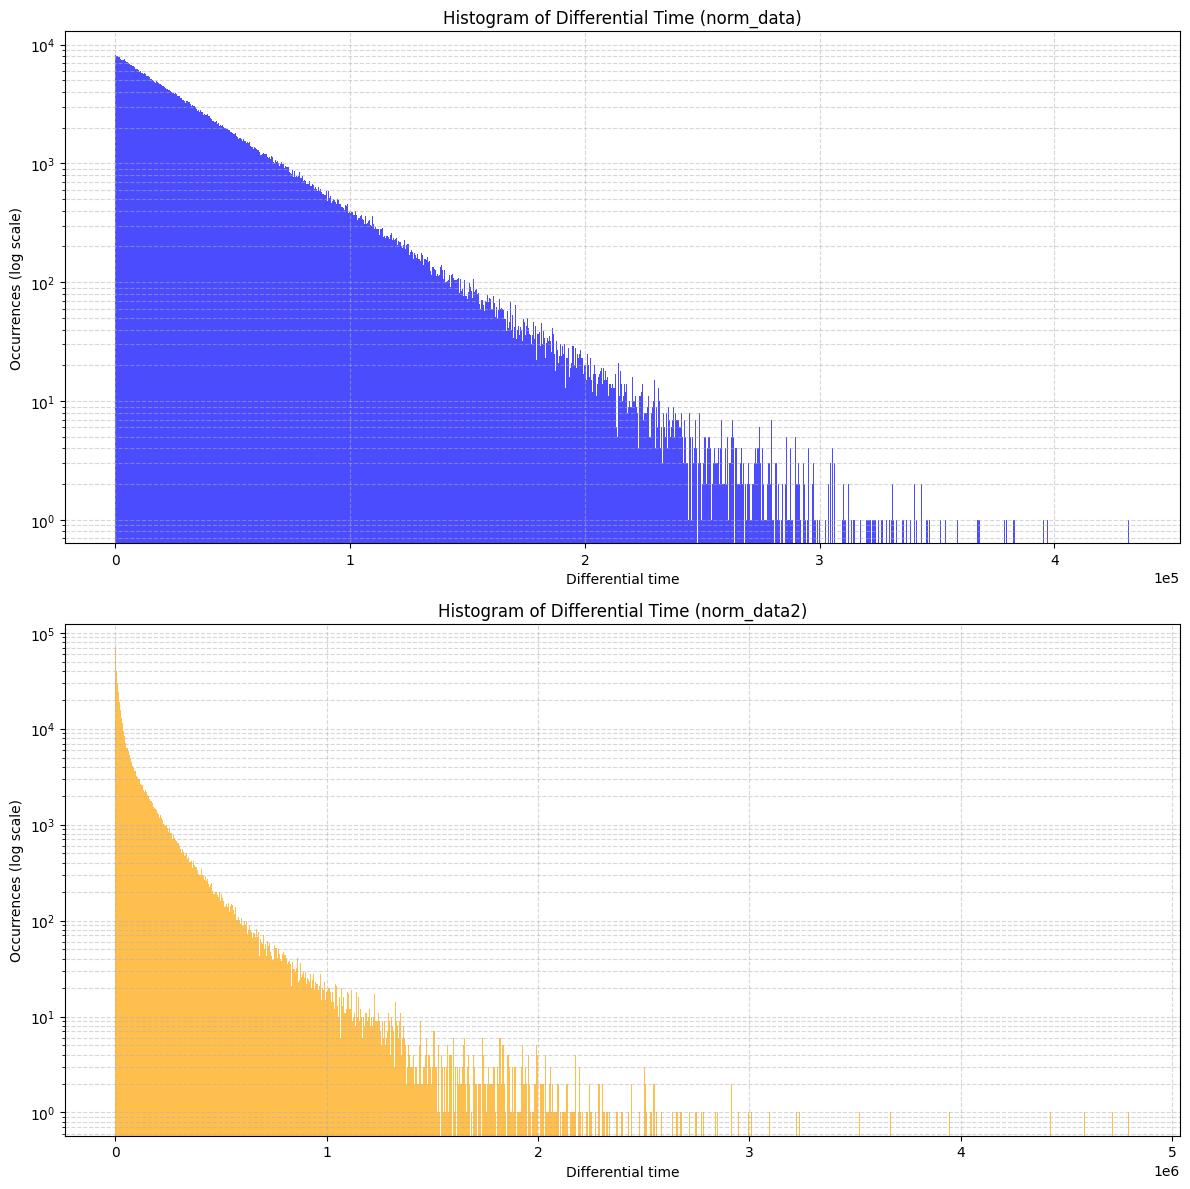

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# First histogram (norm_data)
ax1.hist(bin_edges1[:-1], bins=bin_edges1, weights=counts1, log=True, color='blue', alpha=0.7)
ax1.set_xlabel('Differential time')
ax1.set_ylabel('Occurrences (log scale)')
ax1.set_title('Histogram of Differential Time (norm_data)')
ax1.grid(which='both', linestyle='--', alpha=0.5)
ax1.yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))
ax1.ticklabel_format(style="scientific", axis="x", scilimits=(0, 0))

# Second histogram (norm_data2)
ax2.hist(bin_edges2[:-1], bins=bin_edges2, weights=counts2, log=True, color='orange', alpha=0.7)
ax2.set_xlabel('Differential time')
ax2.set_ylabel('Occurrences (log scale)')
ax2.set_title('Histogram of Differential Time (norm_data2)')
ax2.grid(which='both', linestyle='--', alpha=0.5)
ax2.yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))
ax2.ticklabel_format(style="scientific", axis="x", scilimits=(0, 0))

plt.tight_layout()
plt.show()

In [38]:
def counter(data, threshold):
  counts = []
  total_time = 0
  count = 0

  for time in data:
      total_time += time

      if total_time <= threshold:
          count += 1
      else:
          counts.append(count)
          total_time = 0
          count = 0

  if count > 0:
      counts.append(count)

  return np.array(counts)

In [39]:
deltaT = 10e6 / 81
count_static = counter(norm_data1, deltaT)
count_spinning = counter(norm_data2, deltaT)

print(max(count_static))
print(max(count_spinning))

16
51


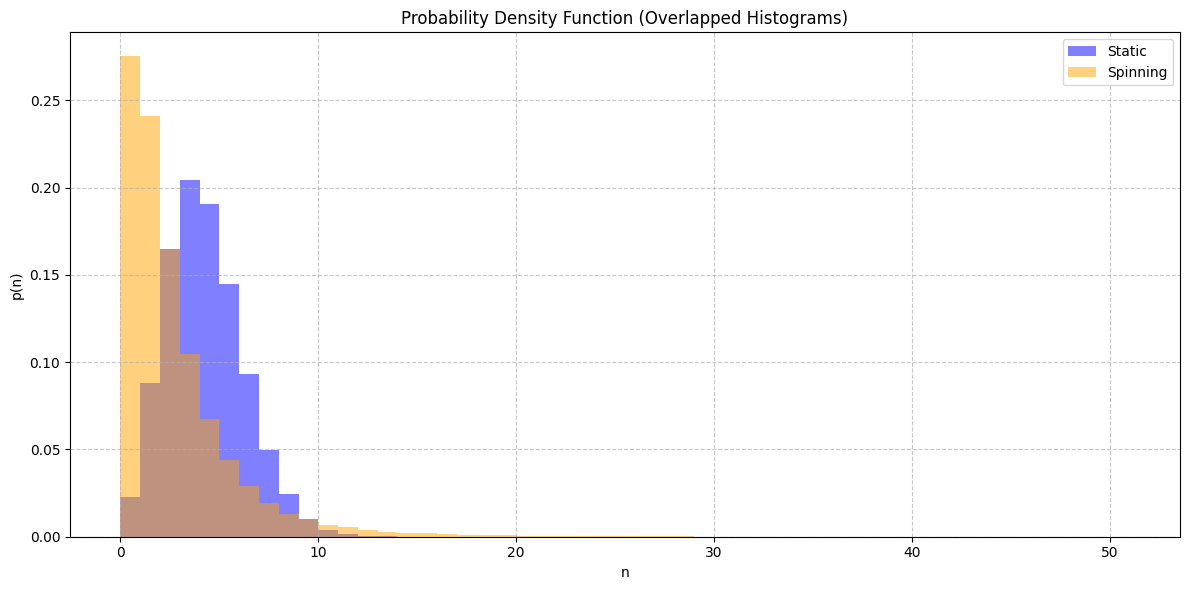

In [40]:
plt.figure(figsize=(12, 6))

plt.hist(count_static, bins=max(count_static), density=True, color='blue', alpha=0.5, label='Static')
plt.hist(count_spinning, bins=max(count_spinning), density=True, color='orange', alpha=0.5, label='Spinning')

plt.xlabel('n')
plt.ylabel('p(n)')
plt.title('Probability Density Function (Overlapped Histograms)')

plt.grid(linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()